In [16]:
import pandas as pd

# load the training dataset
data = pd.read_csv('diabetes_prediction_dataset.csv', delimiter=',', header='infer')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [17]:
# Count the number of NaN values in each column
nan_counts = data.isna().sum()

# Display the counts of NaN values
print(nan_counts)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [18]:
duplicates = data[data.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6             

In [19]:
# Keep only unique rows
data = data.drop_duplicates()

# Display the DataFrame with only unique rows
print("DataFrame with Unique Rows:")
print(data)

DataFrame with Unique Rows:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6 

In [20]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame

# Replace 'No Info' with a placeholder value
data['smoking_history'] = data['smoking_history'].replace('No Info', 'Unknown')

# Label encode the 'smoking_history' column
label_encoder = LabelEncoder()
data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])

# Now you can proceed with your numerical transformations


C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\4110339351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoking_history'] = data['smoking_history'].replace('No Info', 'Unknown')
C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\4110339351.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])


In [21]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'data' is your DataFrame

# Select only the numerical columns for normalization
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the normalized dataset
print(data.head())


   gender       age  hypertension  heart_disease  smoking_history       bmi  \
0  Female  1.000000             0              1                4  0.177171   
1  Female  0.674675             0              0                0  0.202031   
2    Male  0.349349             0              0                4  0.202031   
3  Female  0.449449             0              0                1  0.156863   
4    Male  0.949950             1              1                1  0.118231   

   HbA1c_level  blood_glucose_level  diabetes  
0     0.563636             0.272727         0  
1     0.563636             0.000000         0  
2     0.400000             0.354545         0  
3     0.272727             0.340909         0  
4     0.236364             0.340909         0  


C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\3439381154.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [22]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Convert 'gender' column to binary (0 for Male, 1 for Female)
data['gender'] = data['gender'].apply(lambda x: 0 if x == 'Male' else 1)

# Display the updated dataset
print(data.head())


   gender       age  hypertension  heart_disease  smoking_history       bmi  \
0       1  1.000000             0              1                4  0.177171   
1       1  0.674675             0              0                0  0.202031   
2       0  0.349349             0              0                4  0.202031   
3       1  0.449449             0              0                1  0.156863   
4       0  0.949950             1              1                1  0.118231   

   HbA1c_level  blood_glucose_level  diabetes  
0     0.563636             0.272727         0  
1     0.563636             0.000000         0  
2     0.400000             0.354545         0  
3     0.272727             0.340909         0  
4     0.236364             0.340909         0  


C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\3939430426.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'] = data['gender'].apply(lambda x: 0 if x == 'Male' else 1)


In [23]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with features and target variable
# Assuming 'diabetes' is the target variable

# Split the data into features (X) and target variable (y)
X = data.drop('diabetes', axis=1)
y = data['diabetes']


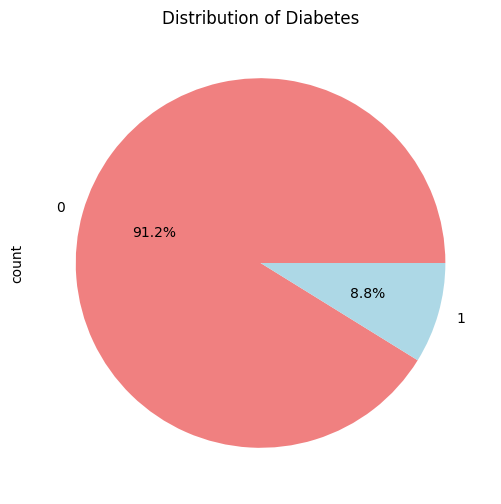

In [24]:
# 1. Distribution of Target Variable (Diabetes)
plt.figure(figsize=(6, 6))
data['diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Distribution of Diabetes')
plt.show()

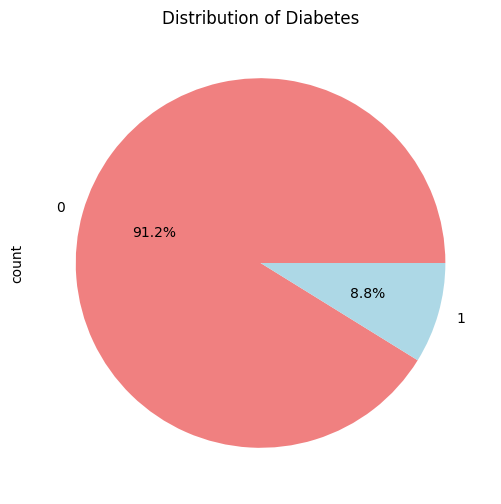

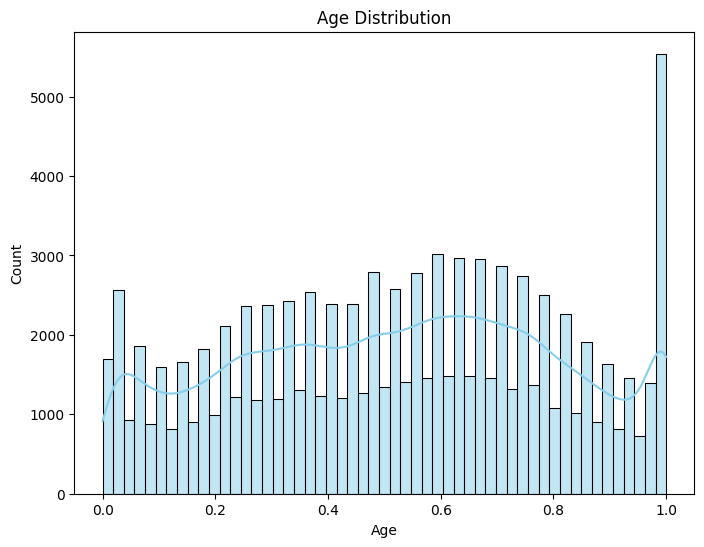

C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\2942603543.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=data, palette='pastel')


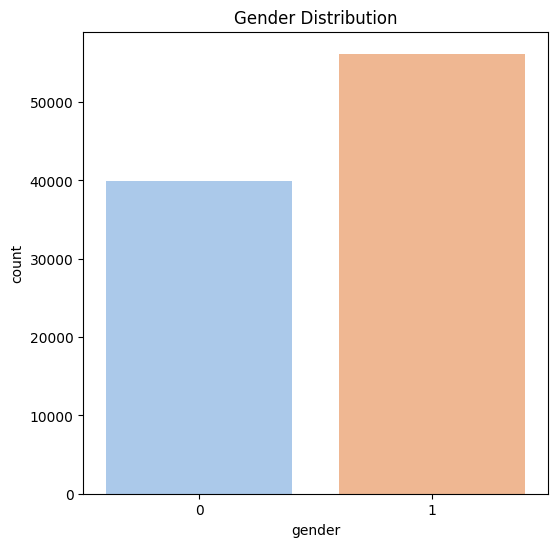

<Figure size 800x600 with 0 Axes>

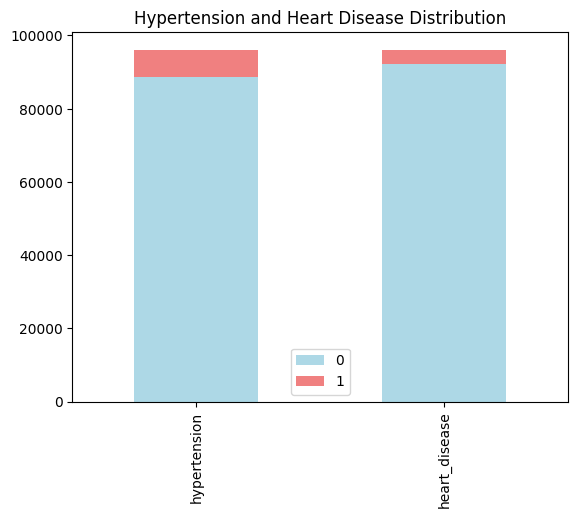

C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\2942603543.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_history', data=data, palette='Set2')


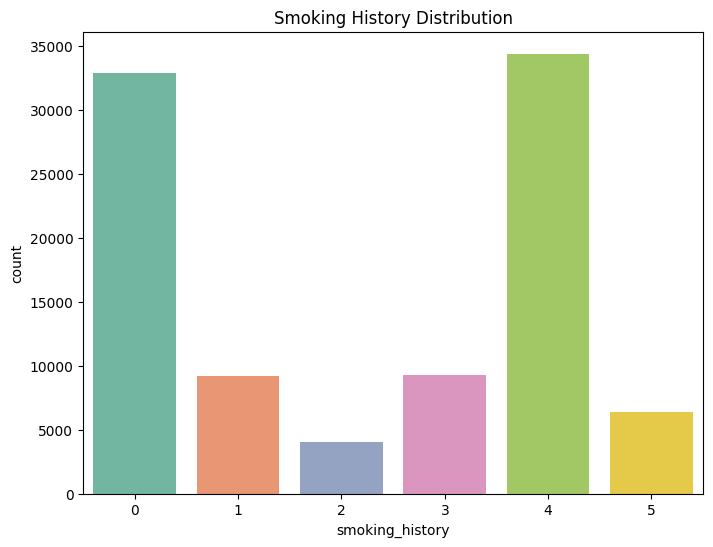

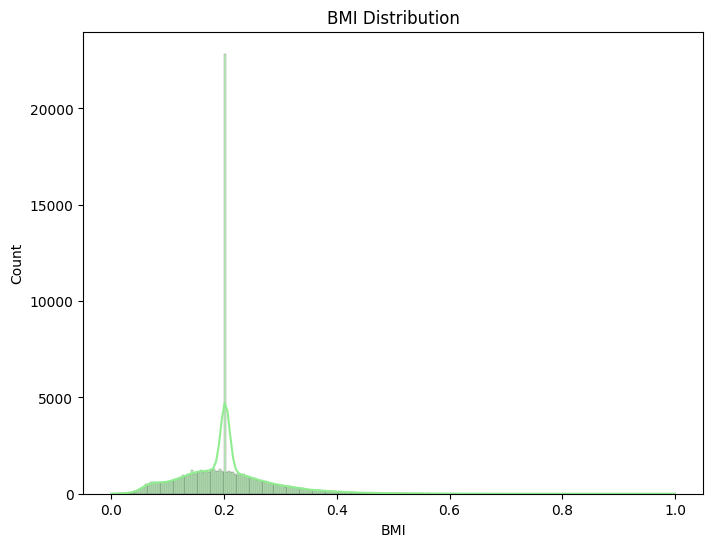

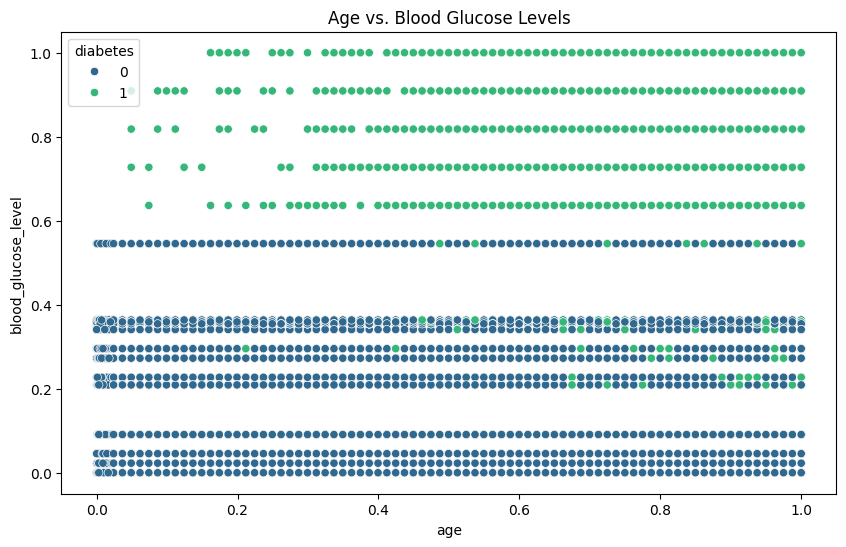

C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\2942603543.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='bmi', data=data, palette='Set3')


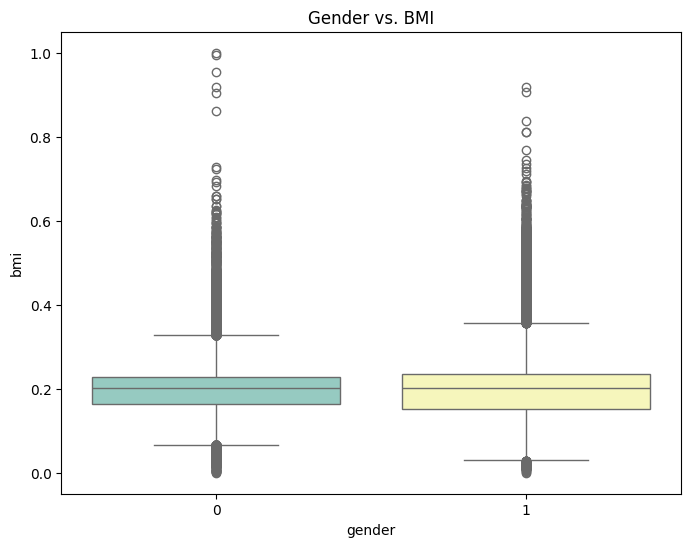

<Figure size 1200x1000 with 0 Axes>

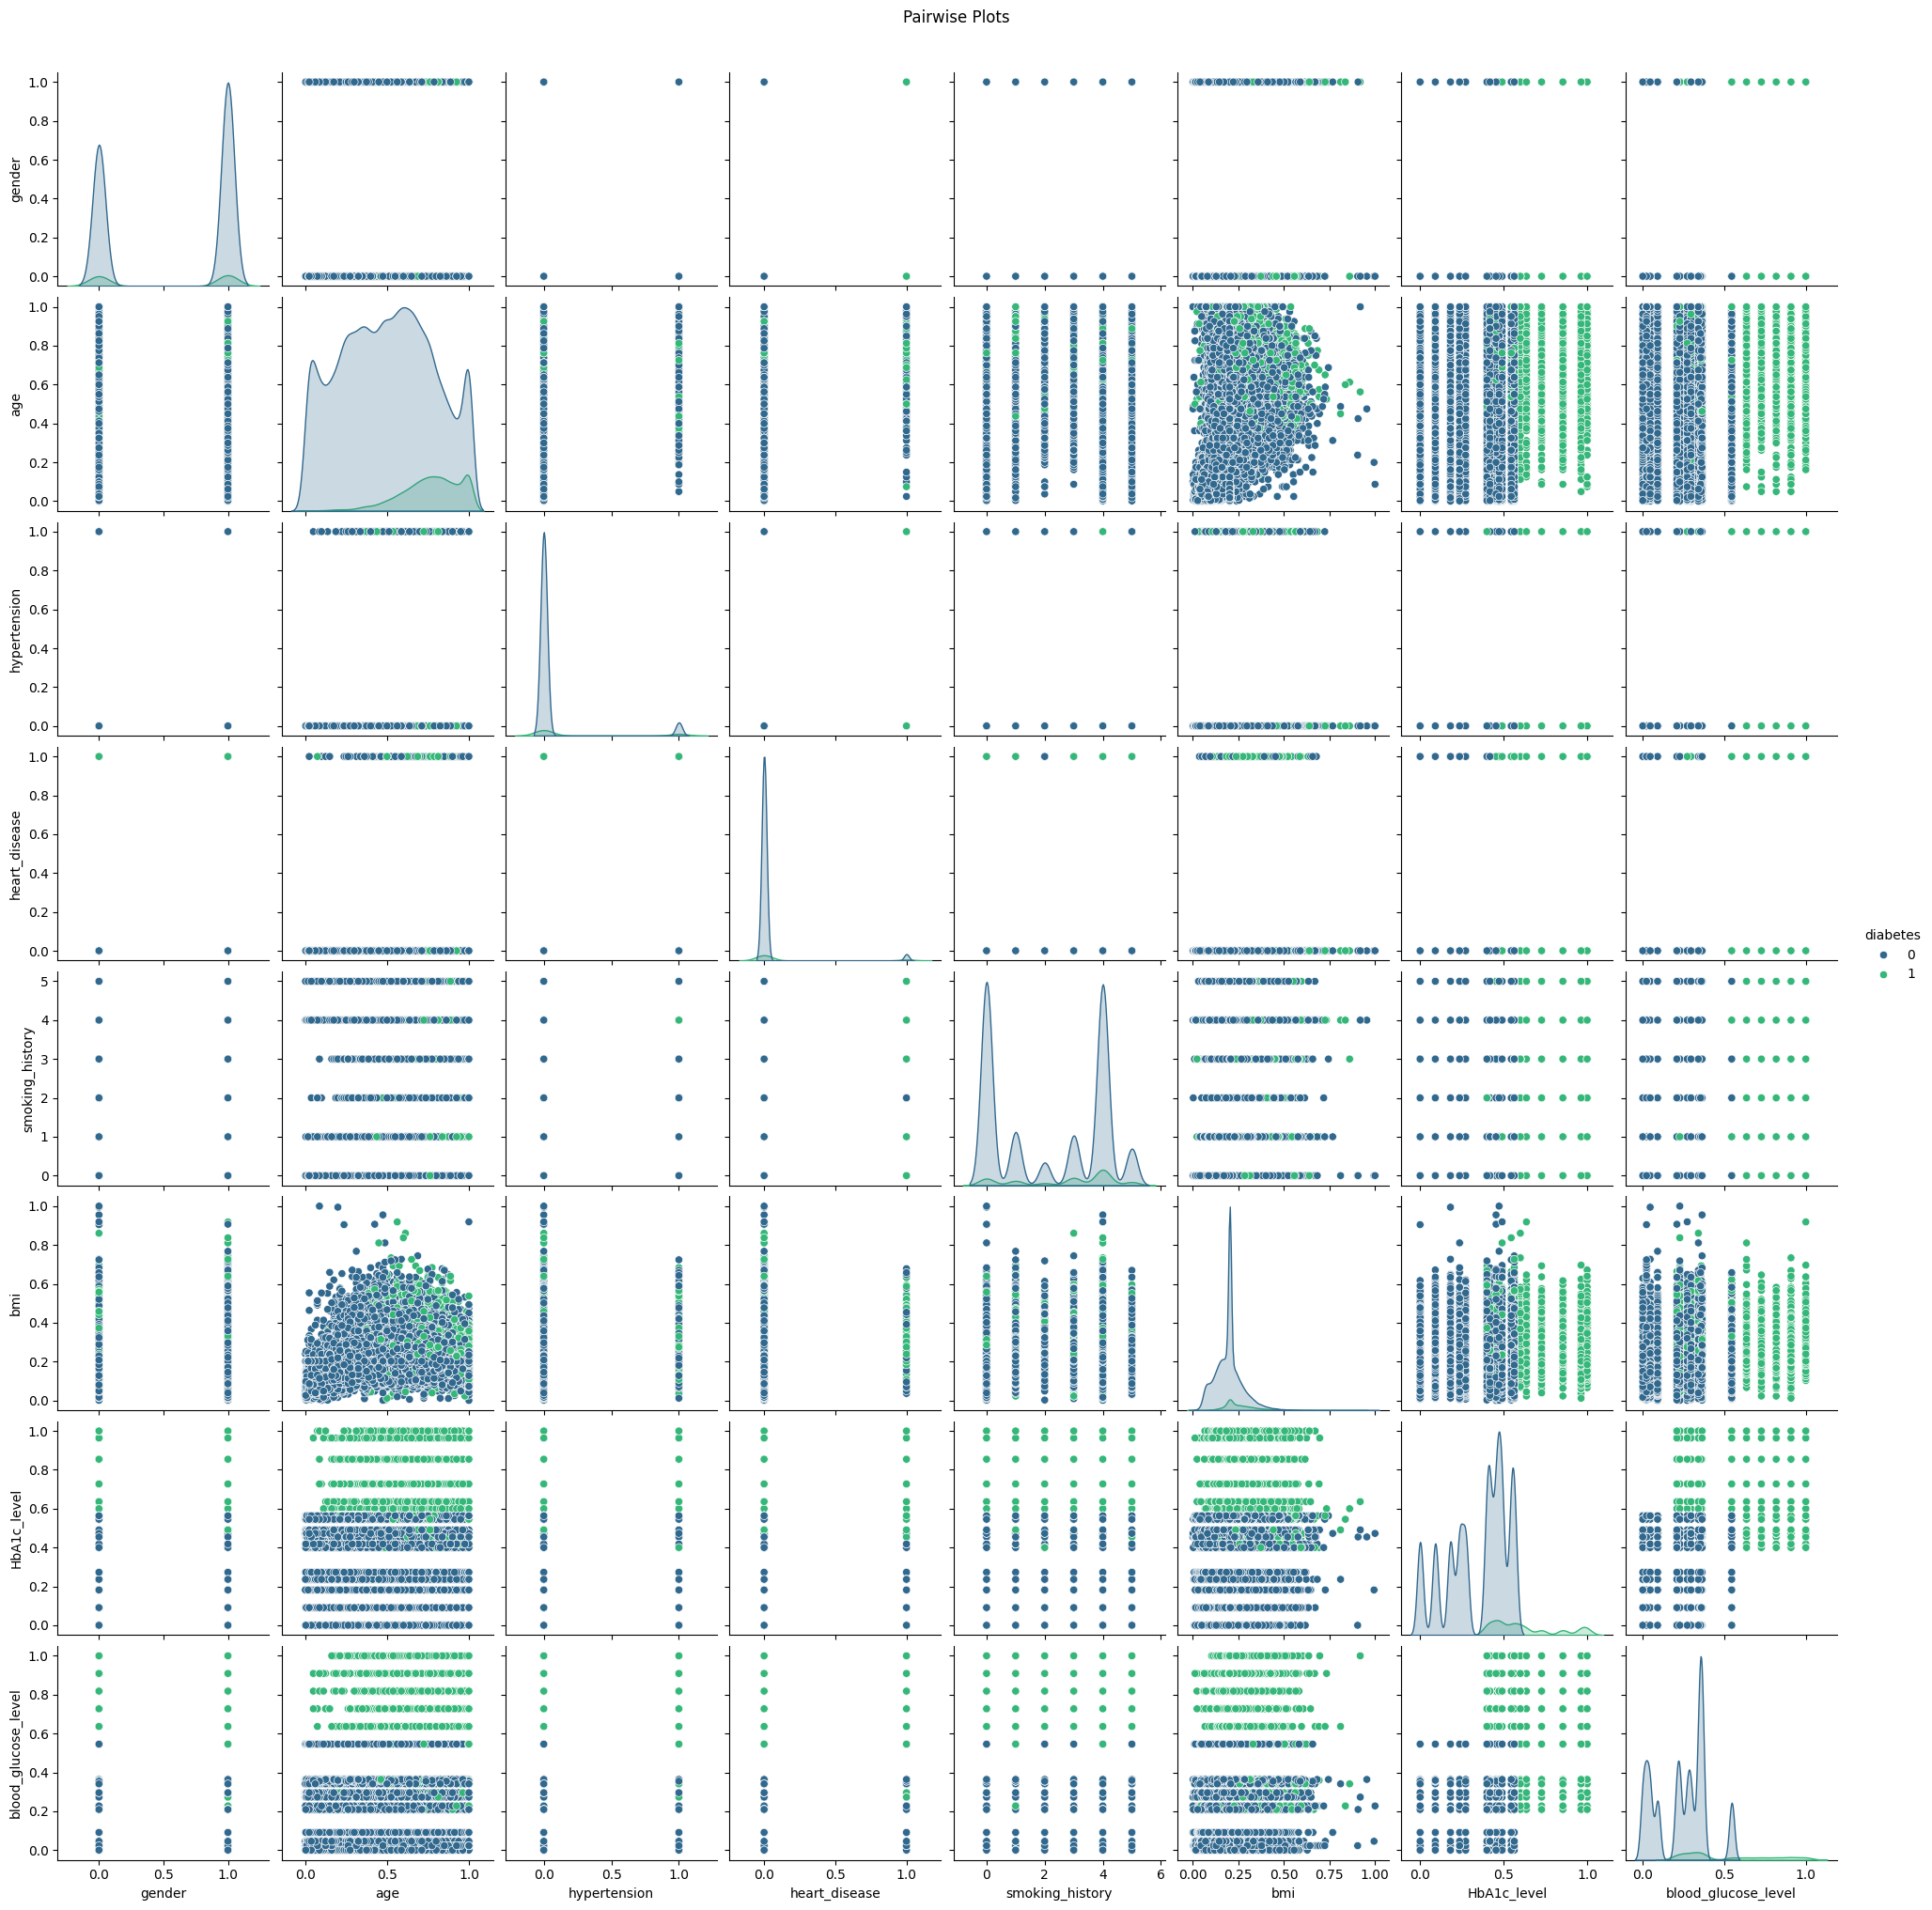

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is your DataFrame

# 1. Distribution of Target Variable (Diabetes)
plt.figure(figsize=(6, 6))
data['diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Distribution of Diabetes')
plt.show()

# 2. Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# 3. Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='gender', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.show()

# 4. Hypertension and Heart Disease Distribution
plt.figure(figsize=(8, 6))
data[['hypertension', 'heart_disease']].apply(pd.Series.value_counts).T.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
plt.title('Hypertension and Heart Disease Distribution')
plt.show()

# 5. Smoking History
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_history', data=data, palette='Set2')
plt.title('Smoking History Distribution')
plt.show()

# 6. BMI Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['bmi'], kde=True, color='lightgreen')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

# 9. Age vs. Blood Glucose Levels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='blood_glucose_level', data=data, hue='diabetes', palette='viridis')
plt.title('Age vs. Blood Glucose Levels')
plt.show()

# 10. Gender vs. BMI
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='bmi', data=data, palette='Set3')
plt.title('Gender vs. BMI')
plt.show()


# 12. Pairwise Plots
plt.figure(figsize=(12, 10))
sns.pairplot(data, hue='diabetes', palette='viridis')
plt.suptitle('Pairwise Plots', y=1.02)
plt.show()


we have the positive diagnosise is 8.8% from the data set so we use Synthetic Minority Over-sampling

In [15]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['gender', 'smoking_history'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set (if needed)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

NameError: name 'SMOTE' is not defined

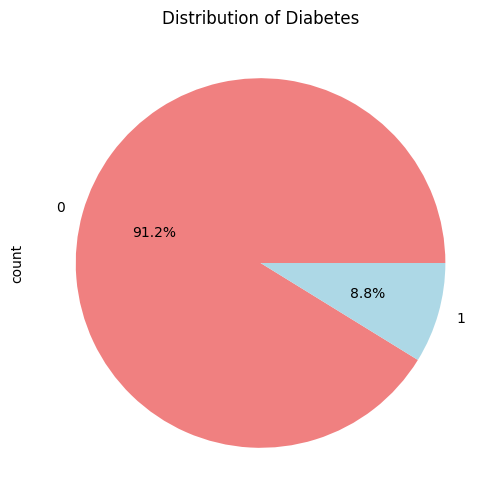

In [26]:
plt.figure(figsize=(6, 6))
y_train.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Distribution of Diabetes')
plt.show()

Logistic Regression


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
    ])

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])


In [28]:
# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the logistic regression model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17360   149]
 [  664  1057]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.88      0.61      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.92      0.80      0.85     19230
weighted avg       0.96      0.96      0.95     19230



    Boosting
    

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
    ])

# Models
models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Evaluate each model
for model_name, model in models.items():
    # Create a pipeline with preprocessing and the current model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    print(f"\n{model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Gradient Boosting:
[[17508     1]
 [  562  1159]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       1.00      0.67      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230


AdaBoost:
[[17494    15]
 [  550  1171]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.99      0.68      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



Decision tree
Random forest

In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

# Evaluate each model
for model_name, model in models.items():
    # Create a pipeline with preprocessing and the current model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    print(f"\n{model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Decision Tree:
[[16937   572]
 [  433  1288]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17509
           1       0.69      0.75      0.72      1721

    accuracy                           0.95     19230
   macro avg       0.83      0.86      0.85     19230
weighted avg       0.95      0.95      0.95     19230


Random Forest:
[[17141   368]
 [  452  1269]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     17509
           1       0.78      0.74      0.76      1721

    accuracy                           0.96     19230
   macro avg       0.87      0.86      0.87     19230
weighted avg       0.96      0.96      0.96     19230



SVM classifier

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'data' is your DataFrame
# Separate features (X) and target variable (y)

X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical columns
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_columns = ['gender', 'smoking_history']

# Create transformers for numerical and categorical columns
numerical_transformer = StandardScaler()

# Apply transformations to numerical columns
X_train[numerical_columns] = numerical_transformer.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = numerical_transformer.transform(X_test[numerical_columns])

# Extract the numerical and categorical features for SVM
X_train_svm = X_train[numerical_columns + categorical_columns]
X_test_svm = X_test[numerical_columns + categorical_columns]

# Calculate class weights
class_weights = dict(zip([0, 1], 1.0 / y_train.value_counts(normalize=True)))

# Create an SVM classifier with class weights
svm_classifier = SVC(kernel='linear', class_weight=class_weights, random_state=42)

# Fit the SVM classifier on the training data
svm_classifier.fit(X_train_svm, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_svm)

# Evaluate the SVM model
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


[[15348  2161]
 [  178  1543]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     17509
           1       0.42      0.90      0.57      1721

    accuracy                           0.88     19230
   macro avg       0.70      0.89      0.75     19230
weighted avg       0.94      0.88      0.90     19230



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], class_weight=class_weight_dict)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

# Make predictions
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


NameError: name 'Sequential' is not defined